In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind
import xgboost as xgb

In [3]:
workdir = "D://miR_Rank_Feautre_selection//Raw_data"

In [4]:
sns.set(style="white")

In [5]:
df_e1 = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
Y_T2D = df_e1["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
X_T2D = df_e1.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
# split data train 70 % and test 30 %
#drop and rotate dataset
X_T2D = X_T2D.T[(X_T2D != 0).any()].T

_number_of_samples = len(X_T2D)
_number_of_items = len(X_T2D.columns.to_list())


In [6]:
# 각 miRNA에 대해 각 샘플들에서 가지고 있는 0의 총 비율이 0.9 이상이면 해당 miRNA 제거
threshold = 0.9
for x in X_T2D.columns:
    try:
        num_zero = X_T2D[x].value_counts(0)[0]
        if num_zero / _number_of_samples > threshold:
            X_T2D = X_T2D.drop([x], axis = 1)
    except KeyError:
        continue

In [7]:
X_T2D

,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,hsa-let-7e-5p,hsa-let-7f-1-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,27.496209,5757.420584,20.354337,572.421088,23.211086,576.170571,606.523529,1.428375,76.060943,2.142562,...,0.178547,0.714187,0.000000,12.319730,16.783401,99.629123,0.357094,28.031850,2.856749,711.330509
SRR5034617,17.487052,12211.478810,13.349737,1326.064677,33.250223,324.103480,710.859702,1.158448,81.863676,2.661673,...,0.179284,0.013791,1.448060,58.529219,7.722988,173.808610,0.055164,11.763766,1.530807,399.830138
SRR5034618,51.480370,44465.243510,25.545184,2590.544879,240.095477,1057.931358,2228.671027,12.626341,1246.741466,4.972536,...,0.292502,0.000000,2.778770,16.233867,34.417748,617.471940,0.731255,14.478854,15.307610,2049.805991
SRR5034619,38.595591,10638.761160,27.037553,698.435723,32.610179,641.264713,901.939748,2.270329,147.364984,4.540658,...,1.031968,0.000000,4.953445,13.209186,21.052141,156.446300,0.206394,31.784604,2.063935,566.550254
SRR5034620,17.703098,3052.382241,18.228933,336.972342,13.671700,402.876946,283.950687,1.139308,41.365656,1.840421,...,0.087639,0.000000,0.525835,11.743640,9.727940,32.514106,0.262917,15.862677,0.964030,219.711226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7412331,71.385132,78696.617310,30.201402,1902.688337,129.042355,135.906310,1290.423547,2.745582,675.413176,8.236746,...,4.118373,1.372791,164.734921,0.000000,6.863955,2315.898430,0.000000,10.982328,10.982328,404.973347
SRR7412332,62.178990,100443.756800,21.945526,1718.151784,138.988330,69.494165,929.027255,0.000000,429.766545,15.544747,...,1.828794,0.000000,43.891051,0.000000,1.828794,2008.015603,0.914397,51.206227,2.743191,629.105071
SRR7412333,66.274923,102931.718600,22.317066,1836.085884,135.254945,124.434550,1294.389828,0.000000,495.033100,18.935692,...,5.410198,1.352549,58.835901,0.676275,4.057648,2239.145622,0.000000,75.742769,4.057648,3494.311515


In [8]:
# 20200717 - Feature selection - using logisticregression using l1 regularization (Lasso)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report

# calculation of p-value from each features
import statsmodels.api as sm

# ROC analysis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

_num_of_features = 3

#df_e1 = pd.read_csv("./Dataset_trimmed_106_prc.txt", sep="\t", index_col=0)



x_train, x_test, y_train, y_test = train_test_split(X_T2D, Y_T2D, test_size=0.3, random_state=42)

# lasso feature selection <- Lasso
# https://scikit-learn.org/stable/modules/feature_selection.html

features_names=x_train.columns.tolist()


# lasso = Lasso(positive=True).fit(x_train, y_train)
clf_l1_LR = LogisticRegression(penalty='l1', solver='saga')
lasso = clf_l1_LR.fit(x_train,y_train)
# find best scored features
select_feature = SelectFromModel(clf_l1_LR, max_features=_num_of_features).fit(x_train, y_train)
#print('Score list:', select_feature.scores_)
#print('Feature list:', x_train.columns)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
feature_sel_X_T2D = select_feature.transform(X_T2D)

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [9]:
select_feature.scores_ = select_feature.estimator_.coef_

In [10]:
_feature_columns = x_train.iloc[:,select_feature.get_support(indices=True)].columns.tolist()

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy is:  0.6206896551724138
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        14
           1       0.75      0.40      0.52        15

    accuracy                           0.62        29
   macro avg       0.66      0.63      0.60        29
weighted avg       0.66      0.62      0.60        29

['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']


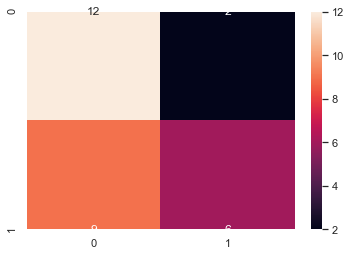

In [11]:
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = LogisticRegression(penalty='l1', solver='saga') # removed on 20190220
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train) # removed on 20190220

y_pred = clf_rf_2.predict(x_test_2) # removed on 20190220


ac_2 = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac_2)
print (classification_report(y_test, y_pred))
cm_2 = confusion_matrix(y_test,y_pred)

sns.heatmap(cm_2,annot=True,fmt="d")

lst = x_train.iloc[:,select_feature.get_support(indices=True)].columns.tolist()

print(lst)



In [11]:
lst = ['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']
fname = "FS_lasso_Clf_lasso"